In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lot

In [2]:
# Generate gaussian data
N = [5000, 5000]
X = np.random.normal(loc=1, scale=1, size=(N[0], 2))
Y = np.random.normal(loc=0, scale=0.1, size=(N[1], 2))

# Compute cost matrices
p = np.power(np.linalg.norm(X, axis=-1, ord=2), 2)
q = np.power(np.linalg.norm(Y, axis=-1, ord=2), 2)

C = np.linalg.norm(X[:, None] - Y[None, :], axis=-1, ord=2) ** 2
C1 = np.vstack((p, np.ones_like(p), -2 * X.T)).T
C2 = np.vstack((np.ones_like(q), q, Y.T)).T

# Uniform distributions
a = np.ones(N[0]) / N[0]
b = np.ones(N[1]) / N[1]

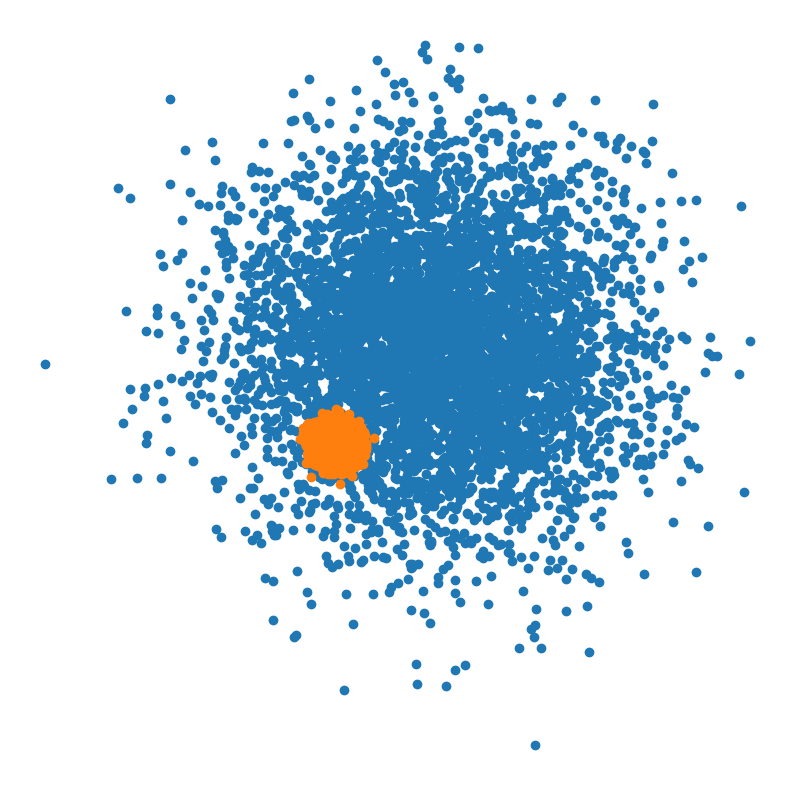

In [3]:
# Display the clouds
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:, 1])
plt.scatter(Y[:,0], Y[:, 1])
plt.axis("off")
plt.show()

In [48]:
epsilon = 0.01
max_time=100
alpha=1e-5
gamma_0 = 5
delta = 1e-5

max_iter_dykstra=10000
delta_dykstra=1e-3
lbd_dykstra=0

rank_list = [10, 50, 100, 300]

cost_lot = []
times_lot = []
err_lot = []

for rank in rank_list:
    print(f"Rank {rank}:", end=" ")
    err, cost, times, _, _, _ = lot.low_rank_ot_linear(
        a, b, rank, C, C1, C2,
        alpha=alpha,
        epsilon=epsilon,
        max_time=max_time,
        gamma=gamma_0,
        delta=delta,
        max_iter_dykstra=max_iter_dykstra,
        delta_dykstra=delta_dykstra,
        lbd_dykstra=lbd_dykstra
    )

    err_lot.append(err)
    cost_lot.append(cost)
    times_lot.append(times)
    print("done")

Rank 10: done
Rank 50: done
Rank 100: done
Rank 300: done


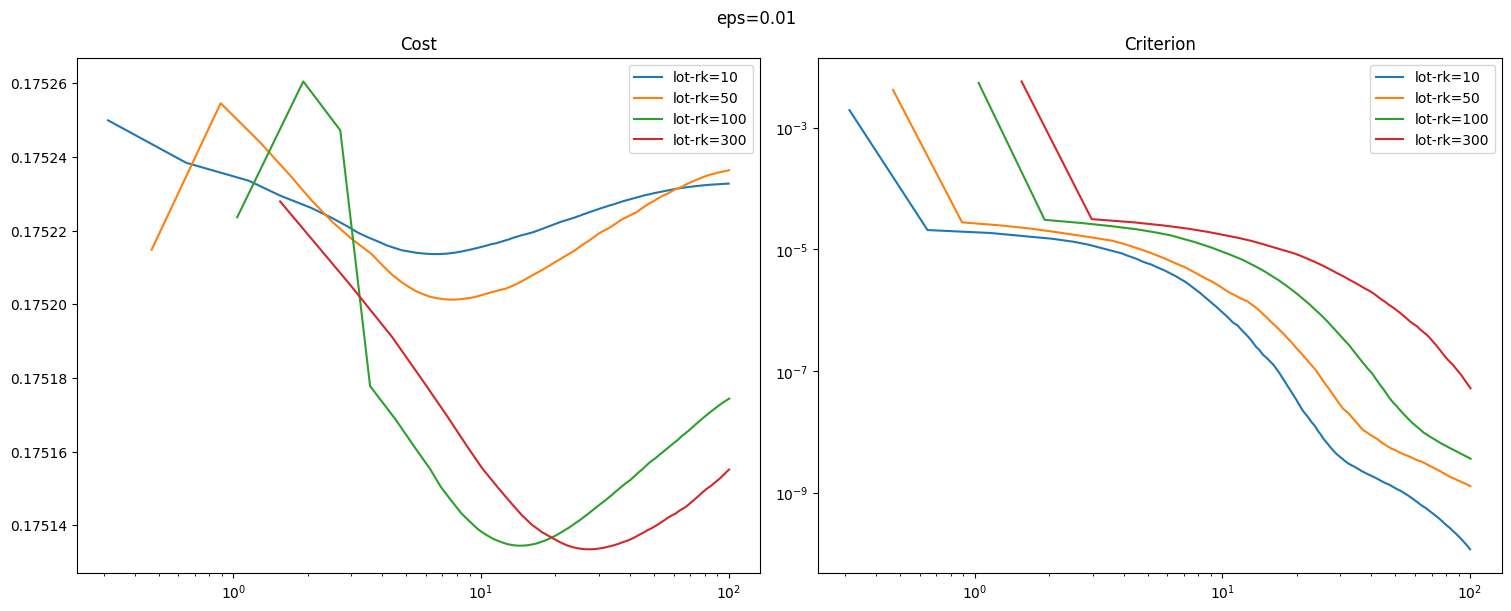

In [49]:
plt.figure(constrained_layout=True, figsize=(15, 6))

plt.suptitle("eps=0.01")

plt.subplot(121)
plt.title("Cost")
for i in range(len(rank_list)):
    rank = rank_list[i]
    plt.plot(times_lot[i], cost_lot[i], label=f"lot-rk={rank}")
plt.legend(loc="best")
plt.semilogx()

plt.subplot(122)
plt.title("Criterion")
for i in range(len(rank_list)):
    rank = rank_list[i]
    plt.plot(times_lot[i], err_lot[i], label=f"lot-rk={rank}")
plt.semilogx()
plt.semilogy()
plt.legend(loc="best")

plt.show()

Cost is almost constant, but the criterion is decreasing.

In [50]:
from tqdm import tqdm

epsilon = 0.01
max_time=20
alpha=1e-5
gamma_0 = 5
delta = 1e-5

max_iter_dykstra=10000
delta_dykstra=1e-3
lbd_dykstra=0

rank_list = np.arange(10,310, 30)

cost_lot = []
times_lot = []

for rank in tqdm(rank_list):
    _, cost, times, _, _, _ = lot.low_rank_ot_linear(
        a, b, rank, C, C1, C2,
        alpha=alpha,
        epsilon=epsilon,
        max_time=max_time,
        gamma=gamma_0,
        delta=delta,
        max_iter_dykstra=max_iter_dykstra,
        delta_dykstra=delta_dykstra,
        lbd_dykstra=lbd_dykstra
    )

    times_lot.append(times)
    cost_lot.append(cost)

100%|██████████| 10/10 [03:22<00:00, 20.29s/it]


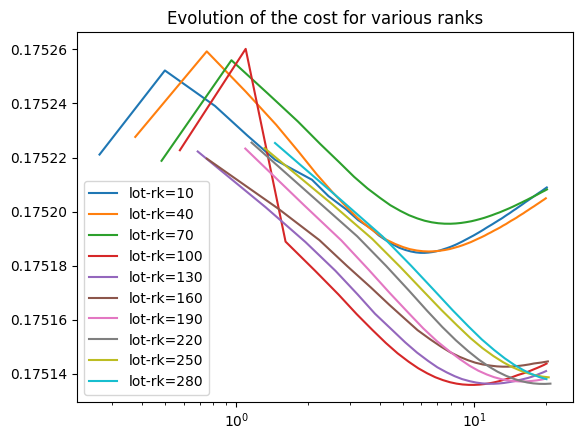

In [51]:
plt.figure()
plt.title("Evolution of the cost for various ranks")
for i in range(len(rank_list)):
    rank = rank_list[i]
    plt.plot(times_lot[i], cost_lot[i], label=f"lot-rk={rank}")
plt.legend(loc="best")
plt.semilogx()
plt.show()

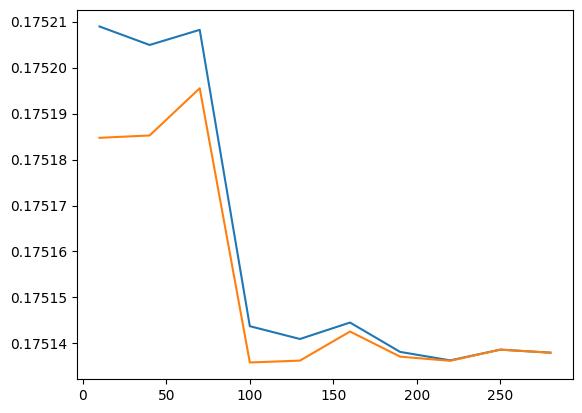

In [52]:
cost_final = [cost[-1] for cost in cost_lot]
cost_min = [cost.min() for cost in cost_lot]
plt.plot(rank_list, cost_final)
plt.plot(rank_list, cost_min)